# 유튜브 랭킹 데이터 수집하기

> 2022/09-01:
> 직장인을 위한 데이터 분석 실무/3장

## - 필요 모듈 설치

최신 Selenium is upgraded to v4.x

```
pip3 install -U selenium
pip3 install webdriver-manager
```


Selenium 3 까지는 selenium 만 설치해도 충분.

```
pip install --user selenium
```

In [ ]:
! pip install -U selenium

In [ ]:
! pip install webdriver-manager

# 1. 유튜브 랭킹 데이터 수집하기

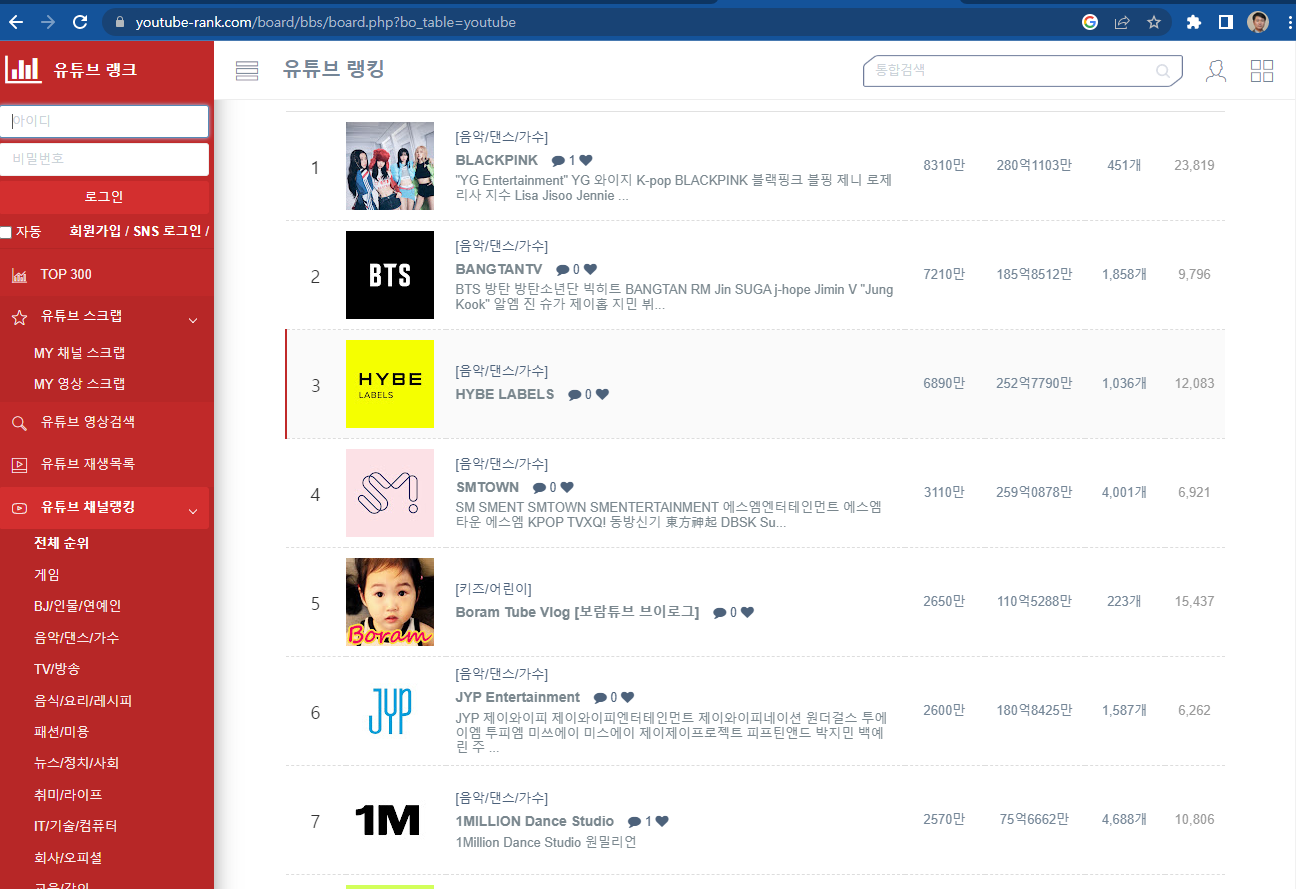

In [1]:
# 라이브러리 추가하기
from selenium import webdriver
webdriver.__version__

'4.6.1'

In [2]:
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [3]:
# Selenium v4 compatible Code Block
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")
driver.quit()

In [4]:
# Selenium v3 : webdriver로 크롬 브라우저 실행하기
# browser = webdriver.Chrome('c:/playwithdata/chromedriver.exe')


### 유튜브 랭킹 접속

In [5]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# create a new chrome session
options = Options()
options.add_argument('headless') #--headless
options.add_argument('no-sandbox') #--no-sandbox

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)

driver.save_screenshot("youtube-rank.com-01.png") 

True

In [8]:
from IPython.display import Image as IPImage

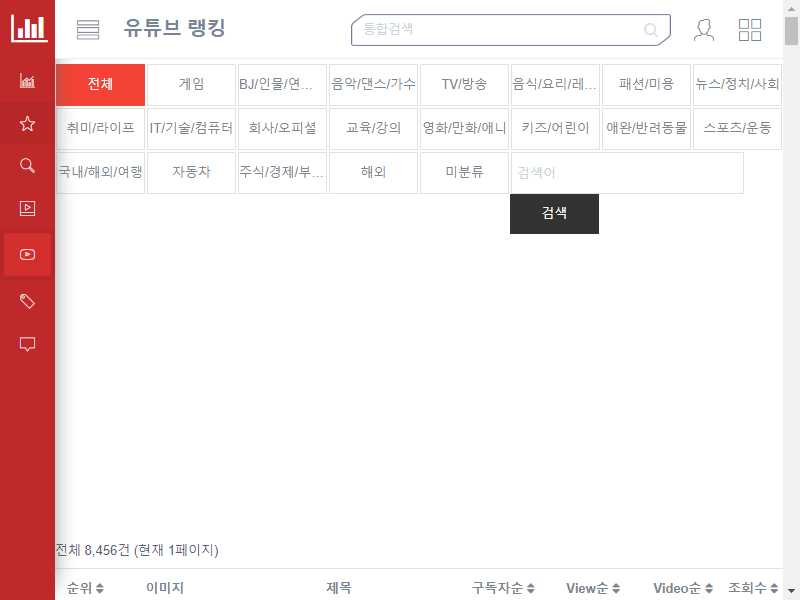

In [10]:
IPImage(driver.get_screenshot_as_png(), width=600)

In [6]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [8]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [9]:
# 채널 태그 출력 및 태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [10]:
# 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [11]:
# 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [12]:
# 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

8310만
280억1103만
451개


In [13]:
# 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    tag_a =  channel.select('h1 > a')
    if tag_a:
        title = tag_a[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text 
        print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 8310만 280억1103만 451개
BANGTANTV [음악/댄스/가수] 7210만 185억8512만 1,858개
HYBE LABELS [음악/댄스/가수] 6890만 252억7790만 1,036개
SMTOWN [음악/댄스/가수] 3110만 259억0878만 4,001개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
JYP Entertainment [음악/댄스/가수] 2600만 180억8425만 1,587개
1MILLION Dance Studio [음악/댄스/가수] 2570만 75억6662만 4,688개
1theK (원더케이) [음악/댄스/가수] 2430만 230억6974만 17,519개
Mnet K-POP [음악/댄스/가수] 1990만 136억4278만 29,627개
KBS WORLD TV [TV/방송] 1840만 142억8856만 60,142개
officialpsy [음악/댄스/가수] 1770만 101억3451만 121개
JFlaMusic [음악/댄스/가수] 1760만 37억1766만 301개
Jane ASMR 제인 [음식/요리/레시피] 1710만 67억8446만 1,659개
TWICE [음악/댄스/가수] 1510만 42억1527만 953개
BIGBANG [음악/댄스/가수] 1490만 75억0693만 776개
Boram Tube ToysReview [보람튜브 토이리뷰] [키즈/어린이] 1440만 49억4521만 584개
Hongyu ASMR 홍유 [음식/요리/레시피] 1430만 45억8582만 563개
BIBO와 장난감 [키즈/어린이] 1270만 30억1646만 166개
Kendrick Lamar [미분류] 1150만 51억0070만 21개
Stray Kids [음악/댄스/가수] 1110만 24억0226만 678개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1110만 68억2460만 2,850개
Toymong tv 토이몽TV [키즈/어린이] 1070만 43억993

### 페이지별 URL 만들기

In [ ]:
# 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

#### 실습: 10페이지까지 크롤링 하기

1. 유튜브 랭킹 화면을 반복문으로 여러 페이지를 크롤링하자.
2. 데이터 프레임에 결과를 변환하고 엑셀 파일로 저장한다.

1. 유튜브 랭킹 화면을 반복문으로 여러 페이지를 크롤링하자.

In [14]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        tag_a =  channel.select('h1 > a')
        if tag_a:
            title = tag_a[0].text.strip() 
            category = channel.select('p.category')[0].text.strip()
            subscriber = channel.select('.subscriber_cnt')[0].text 
            view = channel.select('.view_cnt')[0].text
            video = channel.select('.video_cnt')[0].text
            data = [title, category, subscriber, view, video]
            results.append(data)

2. 데이터 프레임에 결과를 변환하고 엑셀 파일로 저장한다.

In [15]:
results[0]

['BLACKPINK', '[음악/댄스/가수]', '8310만', '280억1103만', '451개']

In [16]:
# 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results, columns = ['title', 'category', 'subscriber', 'view', 'video'])
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8310만,280억1103만,451개
1,BANGTANTV,[음악/댄스/가수],7210만,185억8512만,"1,858개"
2,HYBE LABELS,[음악/댄스/가수],6890만,252억7790만,"1,036개"
3,SMTOWN,[음악/댄스/가수],3110만,259억0878만,"4,001개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [17]:
df.to_excel('youtube_rank.xlsx', index = False)

In [18]:
%ls *.xlsx

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1AFD-D176

 C:\Users\daddy\Lecture_SBA 디렉터리

2022-12-01  오전 11:42            52,111 youtube_rank.xlsx
               1개 파일              52,111 바이트
               0개 디렉터리  120,313,892,864 바이트 남음


In [ ]:
del driver

In [ ]:
del df

# 2. 유튜브 랭킹 데이터 시각화하기

In [19]:
# 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, '한글 타이틀...')

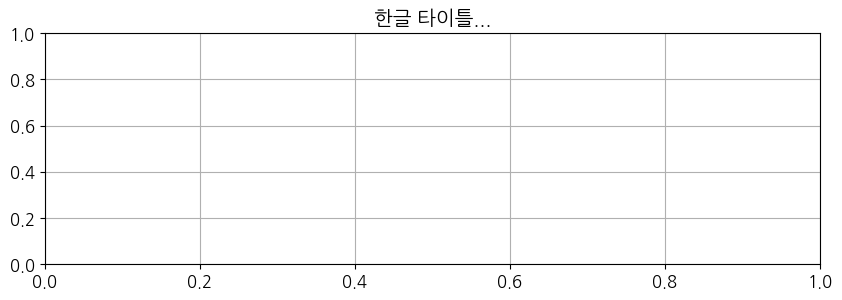

In [21]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 전역 폰트 설정 사용
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

In [22]:
# 엑셀 파일 불러오기
df = pd.read_excel('youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8310만,280억1103만,451개
1,BANGTANTV,[음악/댄스/가수],7210만,185억8512만,"1,858개"
2,HYBE LABELS,[음악/댄스/가수],6890만,252억7790만,"1,036개"
3,SMTOWN,[음악/댄스/가수],3110만,259억0878만,"4,001개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [23]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [25]:
df.head(3)

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8310만,280억1103만,451개
1,BANGTANTV,[음악/댄스/가수],7210만,185억8512만,"1,858개"
2,HYBE LABELS,[음악/댄스/가수],6890만,252억7790만,"1,036개"


In [27]:
df.category[0][1:]

'음악/댄스/가수]'

In [28]:
df.category[0][:-1]

'[음악/댄스/가수'

In [29]:
df.subscriber[0]

'8310만'

In [30]:
df.subscriber[0][:-1]

'8310'

In [32]:
int(df.subscriber[0][:-1])

8310

In [24]:
# 가입자 데이터 살펴보기
df['subscriber'][0:10]

0    8310만
1    7210만
2    6890만
3    3110만
4    2650만
5    2600만
6    2570만
7    2430만
8    1990만
9    1840만
Name: subscriber, dtype: object

In [34]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    83100000
1    72100000
2    68900000
3    31100000
4    26500000
5    26000000
6    25700000
7    24300000
8    19900000
9    18400000
Name: subscriber, dtype: object

In [35]:
# 가입자 데이터 변환
df['subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],83100000,280억1103만,451개
1,BANGTANTV,[음악/댄스/가수],72100000,185억8512만,"1,858개"
2,HYBE LABELS,[음악/댄스/가수],68900000,252억7790만,"1,036개"
3,SMTOWN,[음악/댄스/가수],31100000,259억0878만,"4,001개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],26500000,110억5288만,223개


In [36]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],83100000,280억1103만,451개,83100000
1,BANGTANTV,[음악/댄스/가수],72100000,185억8512만,"1,858개",72100000
2,HYBE LABELS,[음악/댄스/가수],68900000,252억7790만,"1,036개",68900000
3,SMTOWN,[음악/댄스/가수],31100000,259억0878만,"4,001개",31100000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],26500000,110억5288만,223개,26500000


In [ ]:
# 데이터 상세 정보
df.info()

In [37]:
# Series 데이터 타입 변환하기
df['subscriber'] = df['subscriber'].astype('int')
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   int32 
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(2), object(4)
memory usage: 39.2+ KB


In [38]:
df

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],83100000,280억1103만,451개,83100000
1,BANGTANTV,[음악/댄스/가수],72100000,185억8512만,"1,858개",72100000
2,HYBE LABELS,[음악/댄스/가수],68900000,252억7790만,"1,036개",68900000
3,SMTOWN,[음악/댄스/가수],31100000,259억0878만,"4,001개",31100000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],26500000,110억5288만,223개,26500000
...,...,...,...,...,...,...
995,TVING,[미분류],680000,9억0452만,"4,542개",680000
996,Official Dopa,[게임],680000,3억6243만,"1,391개",680000
997,소개해주는 남자,[영화/만화/애니],680000,2억0931만,281개,680000
998,버미쌤,[미분류],680000,1억6457만,302개,680000


In [39]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],102220000,63
[IT/기술/컴퓨터],9070000,7
[TV/방송],260780000,129
[게임],66320000,53
[교육/강의],27380000,21


In [40]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],102220000,63
[IT/기술/컴퓨터],9070000,7
[TV/방송],260780000,129
[게임],66320000,53
[교육/강의],27380000,21


In [41]:
# 데이터 프레임의 인덱스 초기화 하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],102220000,63
1,[IT/기술/컴퓨터],9070000,7
2,[TV/방송],260780000,129
3,[게임],66320000,53
4,[교육/강의],27380000,21


In [42]:
# 데이터 프레임을 내림차순 정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],791130000,160
16,[키즈/어린이],389120000,133
2,[TV/방송],260780000,129
7,[미분류],217220000,160
11,[음식/요리/레시피],208330000,72


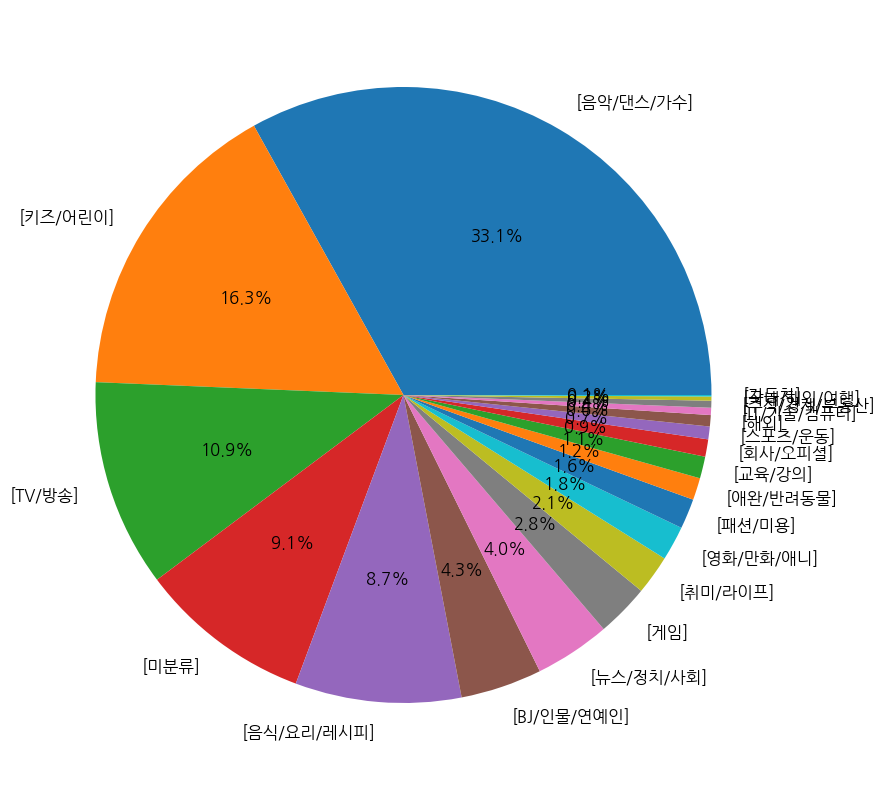

In [43]:
# 카테고리별 구독자수 시각화 하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

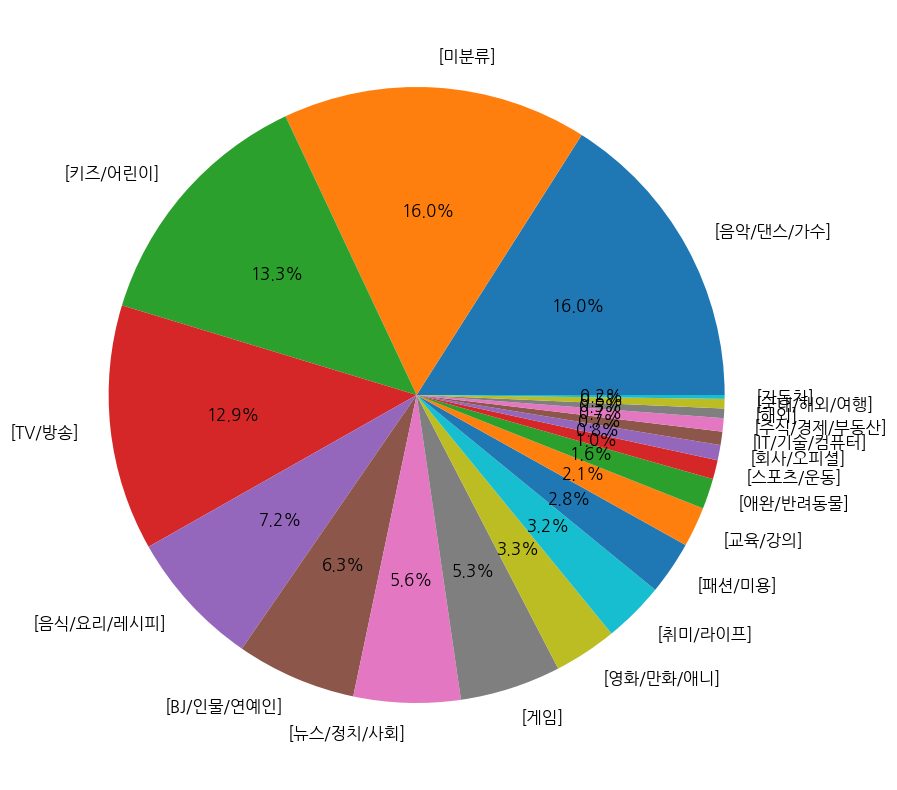

In [44]:
# 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()